드라이브 mount 시행

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/KOPIS/Dataset/FA_dataset

/content/drive/Shareddrives/KOPIS/Dataset/FA_dataset


필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


자치구별 공연장개수, 지하철 총 승하차인원 데이터 불러오기

In [ ]:
data = pd.read_csv('kmeans_data.csv', encoding = 'utf-8')

In [ ]:
data

,자치구,공연장개수,총승하차인원
0,강남구,52,129323369
1,강동구,6,35472721
2,강북구,8,24038790
3,강서구,4,48620762
4,관악구,4,60914946
5,광진구,13,47182738
6,구로구,11,51609708
7,금천구,2,21720726
8,노원구,5,41180343
9,도봉구,5,21636900


클러스터링을 위해 수치형 변수만 남기기

In [ ]:
input = data.drop('자치구', axis = 1)

실루엣 계수를 시각화 하기 위한 함수 정의

In [ ]:
def plotSilhouette(X, n_clusters):
  from matplotlib import cm
    
  plot, fig = plt.subplots(1, 1)

  fig.set_xlim([-0.1, 1])
  fig.set_ylim([0, len(X) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(X)

  silhouette_avg = silhouette_score(X, cluster_labels)

  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10

  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    fig.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    fig.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

  fig.set_title("The silhouette plot for the various clusters.")
  fig.set_xlabel("The silhouette coefficient values")
  fig.set_ylabel("Cluster label")

  fig.axvline(x=silhouette_avg, color="red", linestyle="--")

  fig.set_yticks([])
  fig.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

공연 시설 개수가 Q1 ~ Q3 사이에 있는 자치구만 남기기

In [ ]:
from scipy.stats import iqr

In [ ]:
iqr(data['공연장개수'])

18.0

In [ ]:
data['공연장개수'].quantile([0.25,0.5,0.75])

0.25     5.0
0.50    11.0
0.75    23.0
Name: 공연장개수, dtype: float64

In [ ]:
23 + 1.5*18

50.0

In [ ]:
data_dropped = data.loc[data['공연장개수'] >= 5]

In [ ]:
data_dropped = data_dropped.loc[data_dropped['공연장개수'] <= 23]

In [ ]:
input_dropped = data_dropped.drop(['자치구', 'cluster'], axis = 1)

In [ ]:
input_dropped

,공연장개수,총승하차인원
1,6,35472721
2,8,24038790
5,13,47182738
6,11,51609708
8,5,41180343
9,5,21636900
10,9,29320029
11,6,37352789
13,23,24413345
15,18,47664566


변수 스케일링 시행

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
input_scaled = ss.fit_transform(input_dropped)

k값에 따른 실루엣 계수 확인

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc28e810410>,
                 k=None, metric=None, model=None, timings=True)

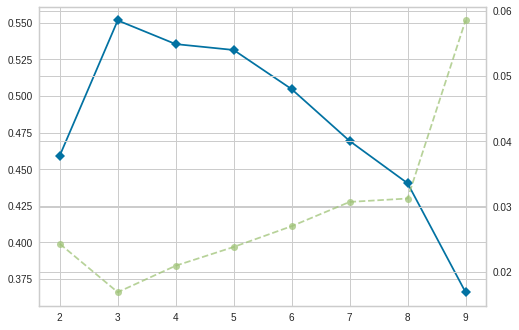

In [ ]:
model = KMeans(random_state = 10)
visualizer = KElbowVisualizer(model, k = (2, 10), metric = 'silhouette', timings = True)
visualizer.fit(input_scaled)

kmeans 클러스터링 시행

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 10)
kmeans.fit(input_scaled)
data_dropped['cluster'] = kmeans.labels_
data_dropped

,자치구,공연장개수,총승하차인원,cluster
1,강동구,6,35472721,0
2,강북구,8,24038790,0
5,광진구,13,47182738,1
6,구로구,11,51609708,1
8,노원구,5,41180343,0
9,도봉구,5,21636900,0
10,동대문구,9,29320029,0
11,동작구,6,37352789,0
13,서대문구,23,24413345,2
15,성동구,18,47664566,1


실루엣 계수 시각화

For n_clusters = 3 The average silhouette_score is : 0.5516673707540565


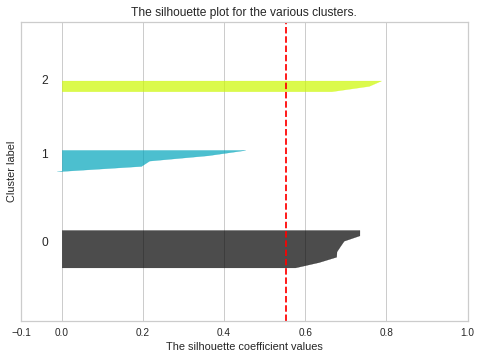

In [ ]:
plotSilhouette(input_scaled, 3)

각 클러스터별 통계량 확인

In [ ]:
data_dropped.groupby(['cluster']).agg(["count", "mean", "std"])

공연장개수                   총승하차인원                            
        count    mean       std  count          mean           std
cluster                                                           
0           8   6.625  1.767767      8  3.097139e+07  7.248116e+06
1           5  15.000  4.301163      5  5.803980e+07  1.274651e+07
2           3  22.000  1.732051      3  2.998774e+07  4.970533e+06

In [ ]:
data_dropped.sort_values(by = ['cluster'])

,자치구,공연장개수,총승하차인원,cluster
1,강동구,6,35472721,0
2,강북구,8,24038790,0
8,노원구,5,41180343,0
9,도봉구,5,21636900,0
10,동대문구,9,29320029,0
11,동작구,6,37352789,0
18,양천구,9,23926576,0
21,은평구,5,34842996,0
5,광진구,13,47182738,1
6,구로구,11,51609708,1
